<a href="https://colab.research.google.com/github/EngrLawal/EngrLawal/blob/main/Grid_optimisation_of_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # To split dataset
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/csv_file/breast_cancer.csv')

In [ ]:
print('df shape: ',df.shape)

df shape:  (569, 33)


In [ ]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


#Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = df.iloc[:, 1:32]     #To drop Unnamed:32 columns
#df=df.drop(columns = ['Unnamed: 32'], inplace=True)

In [ ]:
#df.columns

In [ ]:
df['diagnosis'].unique()     # To get all unique variables

array(['M', 'B'], dtype=object)

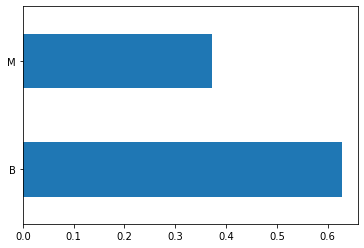

In [ ]:
df['diagnosis'].value_counts(normalize=True).plot(kind='barh')      # To know how balance the data is

#*Encoding*

- Malignant(M) is mapped to be *1*
- Benign(B) is mapped to be 0

In [ ]:
df['diagnosis'] = df['diagnosis'].astype('category')
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B':0})

In [ ]:
X = df.iloc[:,2:33]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Train Using Default settings to serve as base model

In [ ]:
rfc= RandomForestClassifier(random_state=None)
base_model=rfc.fit(X_train, y_train)

In [ ]:
y_pred = base_model.predict(X_test)

print ("Accuracy: ",accuracy_score(y_test, y_pred) )
print ("Malignant predicted correctly: ",recall_score(y_test, y_pred))
print ("Malignant predicted that were actually Malignant: ",precision_score(y_test, y_pred))

Accuracy:  0.9385964912280702
Malignant predicted correctly:  0.8604651162790697
Malignant predicted that were actually Malignant:  0.9736842105263158


# Using grid search for optimization

In [ ]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)      #for cross validation

# To search the best parameters for optimization
rfc_params = {'max_features': range(1,11), 'min_samples_leaf': range(1,5), 'max_depth': range(5,20), 'criterion':['gini','entropy']}

rfc = RandomForestClassifier(random_state=42, n_jobs= -1)

gs = GridSearchCV(rfc, rfc_params, n_jobs=-1, cv=skf, scoring='recall')

model = gs.fit(X_train, y_train)

In [ ]:
Best_Parameters = gs.best_params_, gs.best_score_
Best_Parameters

({'criterion': 'entropy',
  'max_depth': 10,
  'max_features': 4,
  'min_samples_leaf': 1},
 0.9470588235294117)

In [ ]:
#Prediction with best parameters
y_pred = model.predict(X_test)

print ("Accuracy: ",accuracy_score(y_test, y_pred) )
print ("Malignant predicted correctly: ",recall_score(y_test, y_pred))
print ("Malignant predicted that were actually Malignant: ",precision_score(y_test, y_pred))

Accuracy:  0.9649122807017544
Malignant predicted correctly:  0.9302325581395349
Malignant predicted that were actually Malignant:  0.975609756097561


In [ ]:
rfc = gs.best_estimator_
rfc

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=4,
                       n_jobs=-1, random_state=42)

#Explainability

In [ ]:
#!pip install dtreeviz             # install dtreeviz for sklearn
#pip install dtreeviz[xgboost]    # install XGBoost related dependency
#pip install dtreeviz[pyspark]    # install pyspark related dependency
#pip install dtreeviz[lightgbm]   # install LightGBM related dependency

from sklearn import tree

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 40})

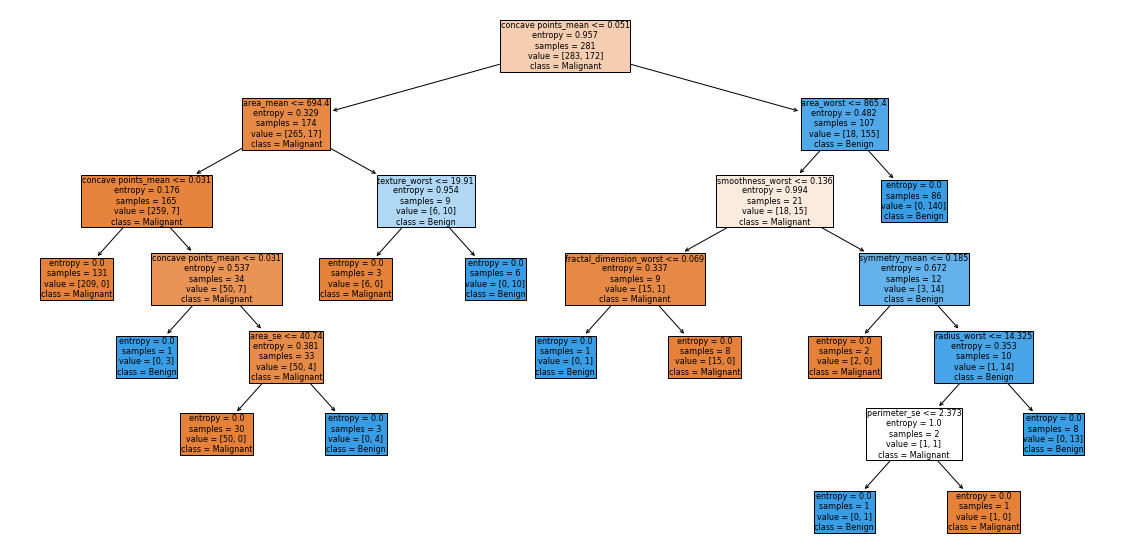

In [ ]:
#rfc.estimators_[0].tree_.max_depth
plt.figure(figsize=(20,10))
tree_1 = tree.plot_tree(rfc.estimators_[0], feature_names=X.columns, class_names=["Malignant", "Benign"],filled=True)


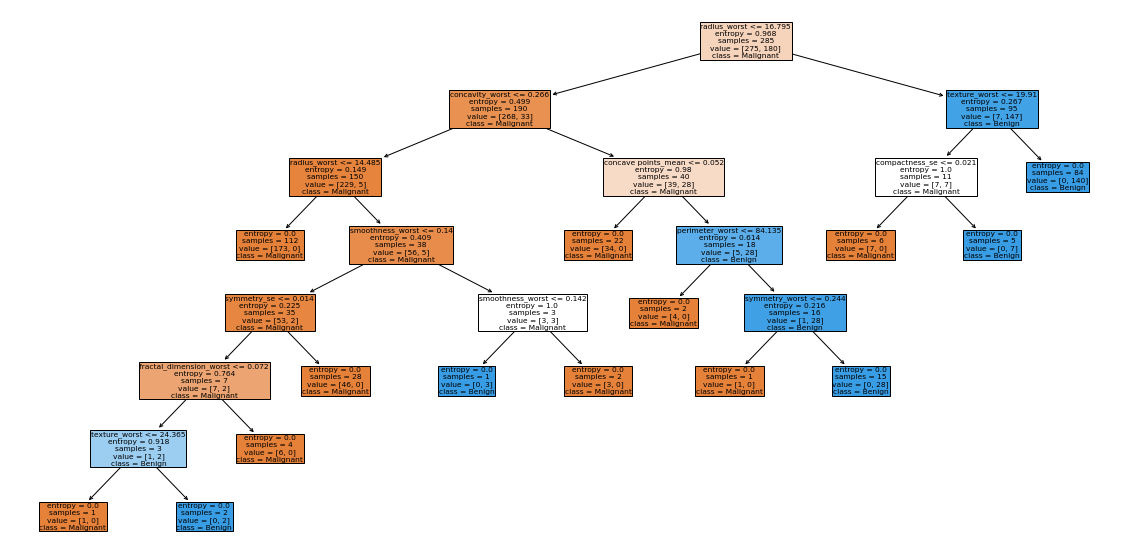

In [ ]:
#rfc.estimators_[50].tree_.max_depth
plt.figure(figsize=(20,10))
tree_1 = tree.plot_tree(rfc.estimators_[50], feature_names=X.columns, class_names=["Malignant", "Benign"],filled=True)

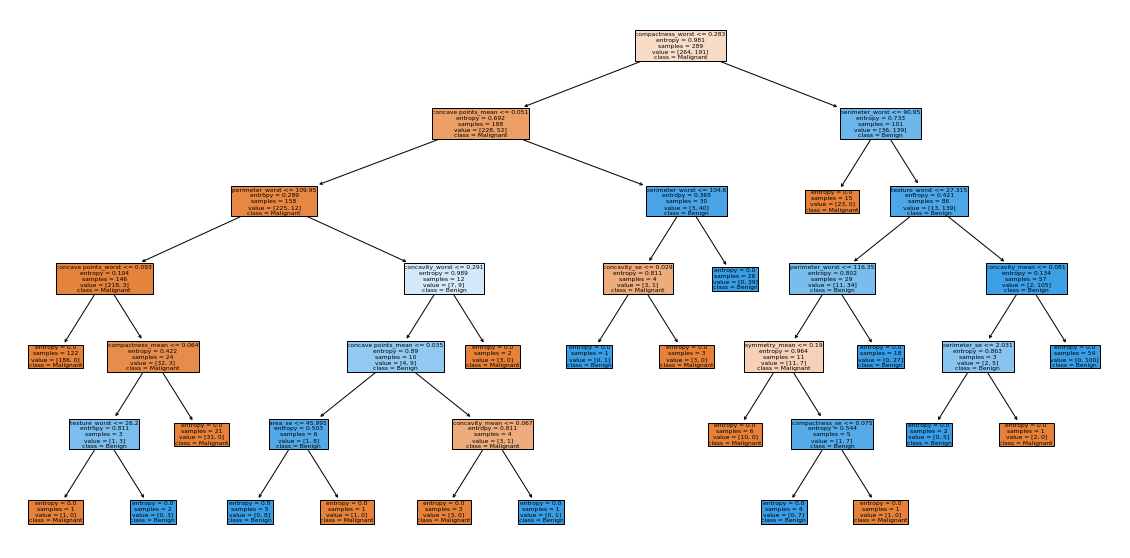

In [ ]:
#rfc.estimators_[99].tree_.max_depth
plt.figure(figsize=(20,10))
tree_1 = tree.plot_tree(rfc.estimators_[99], feature_names=X.columns, class_names=["Malignant", "Benign"],filled=True)